## `Storytelling Data Visualization on Exchange Rates`

There are two types of data visualizations:
* Exploratory Data Visualization: We create graphs for ourselves to better understand and explore data.
* Explanatory Data Visualization: We create graphs for others to inform, make a point, or tell a story.
Throughout the project, we focused on explanatory data visualization and learned the following:
* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.rename(columns ={'[US dollar ]':'US_dollar',r'Period\Unit:':'Time'},inplace=True)

In [5]:
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])

In [6]:
exchange_rates.sort_values("Time",inplace=True)

In [7]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [8]:
euro_to_dollar = exchange_rates[["Time","US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"]!='-']
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


### `Rolling Mean`

In [10]:
import matplotlib.pyplot as plt

In [11]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


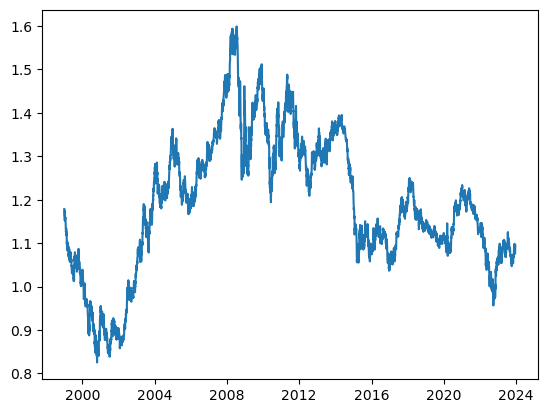

In [12]:
plt.plot(euro_to_dollar["Time"],euro_to_dollar["US_dollar"])
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

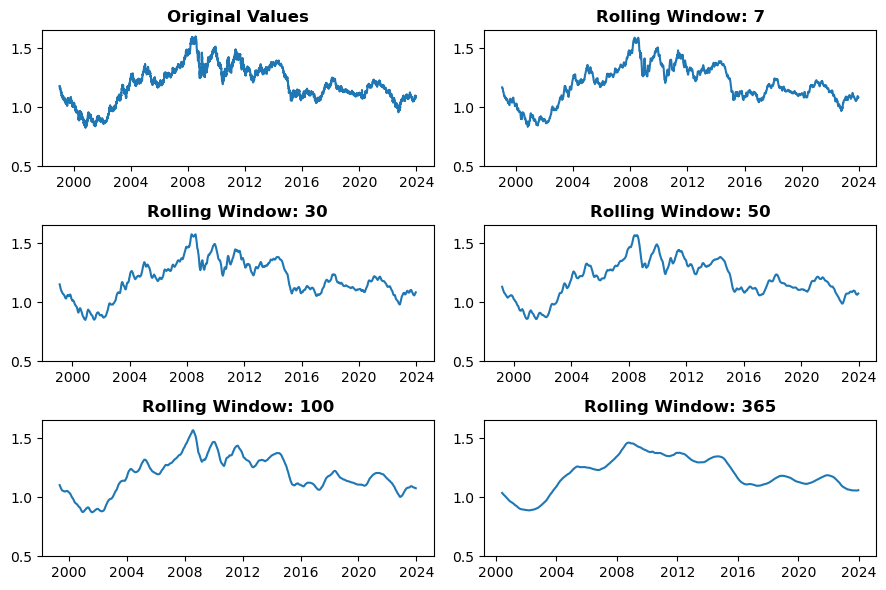

In [13]:
plt.figure(figsize = (9,6))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar["Time"],euro_to_dollar["US_dollar"])
plt.title("Original Values",weight="bold")
plt.ylim(0.5,1.65,0.2)
for i,rolling_mean in zip([2,3,4,5,6],
                         [7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar["Time"],euro_to_dollar["US_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window: "+ str(rolling_mean),weight="bold")
    plt.ylim(0.5,1.65,0.2)
plt.tight_layout()
plt.show()

## `Ideas:`
* We will show how the euro-dollar rate has changed during coronavirus pandemic. We can show the 2020 data and the 2016-2019 as a baseline. We can use a line plot
* We will show how the euro-dollar rate has changed during 2007-2008 crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot
* We will show how the euro-dollar rate has changed under the last three US presidents (George W.Bush(2001-2009), Barack Obama(2009-2017) and Donald Trump(2017-2021)). We can use a line plot

In [14]:
euro_to_dollar["rolling_mean"] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


## `Storytelling Data Visualization`
### `financial crisis 2007-2009`

In [15]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2006)&(euro_to_dollar["Time"].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2007)&(euro_to_dollar["Time"].dt.year <= 2008)]

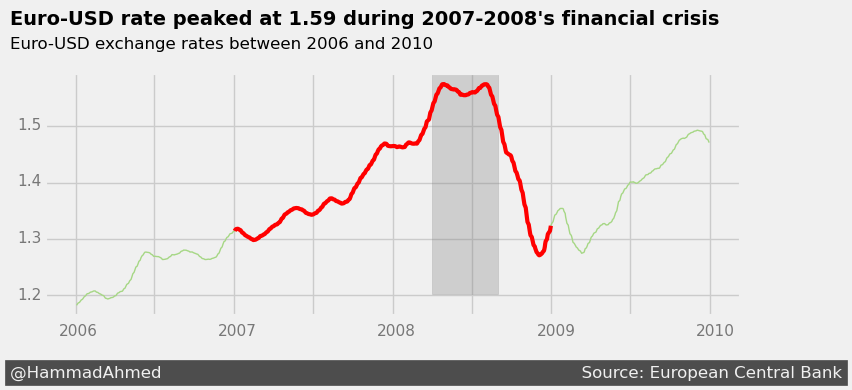

In [16]:
import matplotlib.style as style
style.use("fivethirtyeight")

##Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis["Time"],
       financial_crisis["rolling_mean"],
       linewidth = 1, color = "#A6D785")
#highlighting 2007-2008 period
ax.plot(financial_crisis_7_8["Time"],
       financial_crisis_7_8["rolling_mean"],
       linewidth = 3, color = "red")

ax.set_xticklabels([])

x = 0.02

for year in ['2006','2007','2008','2009','2010']:
    ax.text(x,-0.08,year,alpha = 0.5,fontsize=11,transform = plt.gca().transAxes)
    x+=0.22888
    
ax.set_yticklabels([])
y = 0.07
for rate in ['1.2','1.3','1.4','1.5']:
    ax.text(-0.04,y,rate,alpha=0.5,fontsize=11,transform = plt.gca().transAxes)
    y+=0.2333
    
##Adding a title and subtitle
ax.text(-0.05,1.2,"Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",weight='bold',
        transform=plt.gca().transAxes)
ax.text(-0.05,1.1,"Euro-USD exchange rates between 2006 and 2010",size=12,transform=plt.gca().transAxes)
#Adding a signature
ax.text(-0.05,-0.25,'@HammadAhmed' + ' '*80 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor="#4d4d4d",size=12,transform=plt.gca().transAxes)
ax.axvspan(xmin = pd.to_datetime('2008-04-1'),xmax=pd.to_datetime('2008-09-1'),ymin=0.09,alpha=0.3,color='grey')

plt.show()

### `Covid-19`

In [17]:
corona_crisis_20 = euro_to_dollar.loc[(euro_to_dollar["Time"]>='2020-01-1')&(euro_to_dollar["Time"]<='2020-12-31')]
corona_crisis = euro_to_dollar.loc[(euro_to_dollar["Time"]>='2016-01-1')&(euro_to_dollar["Time"]<='2019-12-31')]

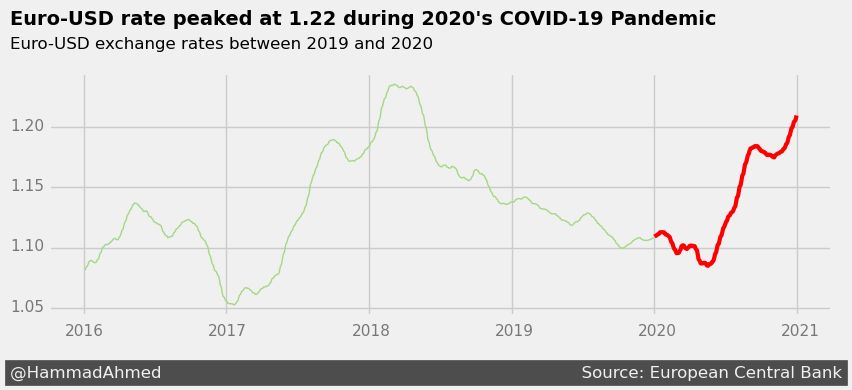

In [18]:
import matplotlib.style as style
style.use("fivethirtyeight")

#adding the plot
fig,ax = plt.subplots(figsize=(9,3))
ax.plot(corona_crisis["Time"],corona_crisis["rolling_mean"],linewidth=1,color="#A6D785")

#highlighting 2007-2008 period
ax.plot(corona_crisis_20["Time"],
       corona_crisis_20["rolling_mean"],
       linewidth = 3, color = "red")

ax.set_xticklabels([])
x = 0.02
for year in ['2016','2017','2018','2019','2020','2021']:
    ax.text(x,-0.08,year, alpha=0.5,fontsize=11,transform=plt.gca().transAxes)
    x+=0.183

ax.set_yticklabels([])
y = 0.02
for rate in ['1.05','1.10','1.15','1.20']:
    ax.text(-0.05,y,rate,alpha=0.5,fontsize=11,transform=plt.gca().transAxes)
    y+=0.248
    
#Adding title and subtitle
ax.text(-0.05,1.2,"Euro-USD rate peaked at 1.22 during 2020's COVID-19 Pandemic",
       weight='bold',transform=plt.gca().transAxes)
ax.text(-.05,1.1,"Euro-USD exchange rates between 2019 and 2020",size=12,transform=plt.gca().transAxes)

#Adding a signature 
ax.text(-0.05,-0.25,'@HammadAhmed' + ' '*80 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor="#4d4d4d",size=12,transform=plt.gca().transAxes)
plt.show()

### `The US presidencies Example`

In [19]:
bush_obama_trump = euro_to_dollar.copy(
                    )[(euro_to_dollar["Time"].dt.year >= 2001)&(euro_to_dollar["Time"].dt.year <= 2021)]
bush = bush_obama_trump.copy(
        )[bush_obama_trump["Time"].dt.year <2009]
obama = bush_obama_trump.copy(
        )[(bush_obama_trump["Time"].dt.year >= 2009)&(bush_obama_trump["Time"].dt.year <2017)]
trump = bush_obama_trump.copy(
        )[(bush_obama_trump["Time"].dt.year >= 2017)&(bush_obama_trump["Time"].dt.year <2021)]

Below you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

* We first build three graphs on a 2-by-3 grid (This Grid should have six subplots,but we only build three; the bottom row remains empty)
* We then build only the bottom graph of a 2-by-1 grid (This Grid should have two subplots;the top row remains empty)
* The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

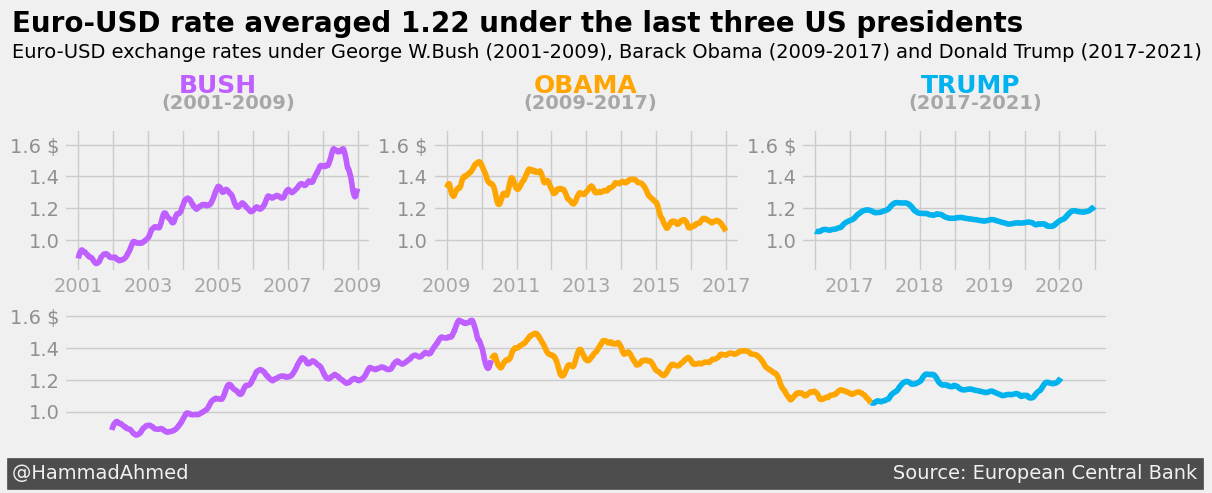

In [24]:
#Adding the fivethirtyeight style
import matplotlib.style as style
style.use("fivethirtyeight")
#Adding the subplots
plt.figure(figsize=(12,6))
#pattern 1
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
#pattern 2
ax4 = plt.subplot(3,1,2)

axes = [ax1,ax2,ax3,ax4]

#Changes to all subplots
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6 $'],alpha=0.4)


## Ax1: Bush
ax1.plot(bush["Time"],bush["rolling_mean"],color="#BF5FFF")
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha=0.3)
ax1.text(0.11,2.45,'BUSH',fontsize=18,weight='bold',color='#BF5FFF',transform=plt.gca().transAxes)
ax1.text(0.093,2.34,'(2001-2009)',weight='bold',alpha=0.3,transform=plt.gca().transAxes)

## Ax2: Obama
ax2.plot(obama["Time"],obama["rolling_mean"],color="#ffa500")
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha=0.3)
ax2.text(0.45,2.45,'OBAMA',fontsize=18,weight='bold',color='#ffa500',transform=plt.gca().transAxes)
ax2.text(0.44,2.34,'(2009-2017)',weight='bold',alpha=0.3,transform=plt.gca().transAxes)

# Ax3: Trump
ax3.plot(trump["Time"],trump["rolling_mean"],color = "#00B2EE")
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'],alpha=0.3)
ax3.text(0.82,2.45,'TRUMP',fontsize=18,weight='bold',color='#00B2EE',transform=plt.gca().transAxes)
ax3.text(0.808,2.34,'(2017-2021)',weight='bold',alpha=0.3,transform=plt.gca().transAxes)

#Ax4: Bush-Obama-Trump
ax4.plot(bush["Time"],bush["rolling_mean"],color="#BF5FFF")
ax4.plot(obama["Time"],obama["rolling_mean"],color="#ffa500")
ax4.plot(trump["Time"],trump["rolling_mean"],color = "#00B2EE")
ax4.set_xticks([])

#Adding A title and subtitle
ax1.text(-0.05,2.88,"Euro-USD rate averaged 1.22 under the last three US presidents", fontsize=20,
       weight='bold',transform=plt.gca().transAxes)
ax1.text(-.05,2.7,"Euro-USD exchange rates under George W.Bush (2001-2009), Barack Obama (2009-2017) and Donald Trump (2017-2021)",
         fontsize=14,transform=plt.gca().transAxes)

#Adding signature
ax.text(-0.05,-0.25,'@HammadAhmed' + ' '*115 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor="#4d4d4d",size=14,transform=plt.gca().transAxes)


plt.show()

## `Conclusion`
Based on the analysis of the dataset from the European Central Bank, it's evident that the value of the US dollar relative to the euro exhibited notable fluctuations during different presidential administrations. 

During the leadership of George Bush, the graph illustrates a significant depreciation of the dollar against the euro. This depreciation could be attributed to various factors, including economic policies, geopolitical events, and market sentiment during that period. For instance, the aftermath of the 2008 financial crisis, coupled with increased government spending and military interventions, might have contributed to a weakened dollar.

Under the leadership of Barack Obama, the graph indicates a more controlled trajectory, suggesting a stabilization of the dollar's value relative to the euro. This stability could be a result of economic stimulus measures, regulatory reforms, and diplomatic efforts aimed at restoring confidence in the US economy and financial markets post-crisis.

During the Trump administration, the graph shows relative stability in the dollar-euro exchange rate. This stability might be attributed to a combination of factors, including fiscal policies, trade negotiations, and market expectations. Despite the volatility in global markets and geopolitical tensions during this period, the administration's focus on economic growth and deregulation may have contributed to maintaining a stable exchange rate.

In conclusion, the fluctuations in the dollar-euro exchange rate observed across different presidential administrations reflect the interplay of various economic, political, and global factors. While each administration's policies and external events influence currency values differently, the analysis underscores the complex dynamics that shape exchange rate movements in the international financial landscape.